In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

/home/aacastro/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [15]:
df = pd.read_csv('df_results.csv')
print(df.shape)
print(f"Se han probado {df.shape[0]} modelos diferentes")
print(f"Columnas del dataframe: ", df.columns)
df.set_index('Model', inplace=True)
df.head(5)

(442, 19)
Se han probado 442 modelos diferentes
Columnas del dataframe:  Index(['Unnamed: 0', 'File', 'Model', 'Path', 'F1_Score_Media',
       'F1_Score_Desviacion', 'Recall_Media', 'Recall_Desviacion',
       'Precision_Media', 'Precision_Desviacion', 'Roc_Auc_Media',
       'Roc_Auc_Desviacion', 'Confusion_Matrix_Media',
       'Confusion_Matrix_Desviacion', 'config', 'kernel_widths', 'filters',
       'dropouts', 'test_suite_thresholds'],
      dtype='object')


,Unnamed: 0,File,Path,F1_Score_Media,F1_Score_Desviacion,Recall_Media,Recall_Desviacion,Precision_Media,Precision_Desviacion,Roc_Auc_Media,Roc_Auc_Desviacion,Confusion_Matrix_Media,Confusion_Matrix_Desviacion,config,kernel_widths,filters,dropouts,test_suite_thresholds
Model,,,,,,,,,,,,,,,,,,
model_config1_architecture_5conv_3dense_1,0,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.904706,0.020584,0.924315,0.031048,0.887374,0.034605,0.934534,0.017095,"[[28.076751450245425, 7.621597501115572], [4.8...","[[2.7016636017587725, 2.639215629566634], [1.9...",config1,50_cte,16_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"
model_config2_architecture_5conv_3dense_1,1,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.903533,0.027243,0.902288,0.059111,0.908553,0.032508,0.940282,0.017012,"[[29.732262382864793, 5.966086568496206], [6.2...","[[2.904713227750578, 2.360089335237042], [3.80...",config2,50_cte,16_cte,0.3_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"
model_config3_architecture_5conv_3dense_1,2,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.899654,0.047426,0.894649,0.090081,0.912627,0.032554,0.942381,0.017814,"[[30.017849174475682, 5.680499776885319], [6.8...","[[2.7651678174862115, 2.411687033153705], [6.0...",config3,50_cte,32_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"
model_config4_architecture_5conv_3dense_1,3,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.901727,0.031290,0.900571,0.067490,0.908002,0.038502,0.942426,0.017920,"[[29.65863453815261, 6.039714413208389], [6.39...","[[2.8637019183295664, 2.884831410936749], [4.3...",config4,50_cte,32_cte,0.3_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"
model_config5_architecture_5conv_3dense_1,4,detailed_metrics.json,/home/aacastro/Alejandro/DQ_ACA_2024/A)/result...,0.903717,0.030895,0.897538,0.062384,0.913592,0.023341,0.945683,0.014810,"[[30.16064257028112, 5.537706381079874], [6.56...","[[2.6367926717968544, 1.7240226019935716], [3....",config5,20_cte,16_cte,0.5_cte,"[0.6, 0.65, 0.7, 0.75, 0.8]"


# Test de Hipótesis

- H0: Las medias de F1-Score siguen la misma distribución  
- H1: Las medias de F1-Score siguen distribuciones diferentes

In [4]:
import plotly.graph_objs as go

# Crear la figura
fig = go.Figure()

# Agregar el gráfico de caja y bigotes
fig.add_trace(go.Box(
    x=df['kernel_widths'],
    y=df['F1_Score_Media'],
    name='Box Plot',
    boxpoints='all'
))

# Actualizar el diseño
fig.update_layout(
    title='Comparación de F1 Score Media por Anchura de Kernel',
    xaxis=dict(title='Anchura del Kernel'),
    yaxis=dict(title='F1 Score Media'),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

# Mostrar la figura
fig.show()

# Test ANOVA (one-way) (kernel_widths)

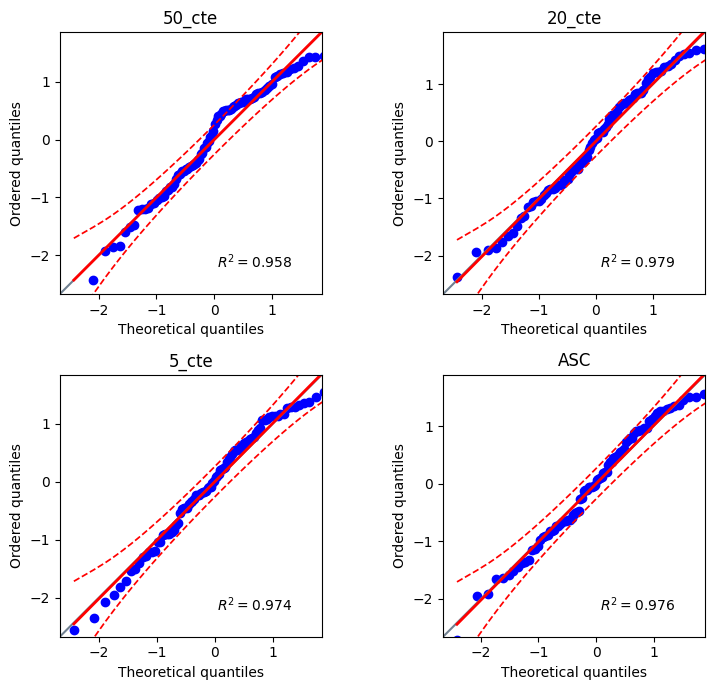

In [5]:
import pingouin as pg

# Gráficos qqplotpara comprobar normalidad
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(df.loc[df.kernel_widths=='50_cte', 'F1_Score_Media'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('50_cte')
pg.qqplot(df.loc[df.kernel_widths=='20_cte', 'F1_Score_Media'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('20_cte')
pg.qqplot(df.loc[df.kernel_widths=='5_cte', 'F1_Score_Media'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('5_cte')
pg.qqplot(df.loc[df.kernel_widths=='ASC', 'F1_Score_Media'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('ASC')
plt.tight_layout()

In [6]:
# Test de normalidad Shapiro-Wilk
# ==============================================================================
pg.normality(data=df, dv='F1_Score_Media', group='kernel_widths')

,W,pval,normal
kernel_widths,,,
50_cte,0.956951,0.004058,False
20_cte,0.972844,0.051575,True
5_cte,0.968739,0.028843,False
ASC,0.971406,0.048629,False
DESC,0.970765,0.063493,True


In [7]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df, dv='F1_Score_Media', group='kernel_widths', method='levene')

,W,pval,equal_var
levene,2.837029,0.024109,False


In [8]:
# Test ANOVA de una vía (One-way ANOVA)
# ==============================================================================
pg.anova(data=df, dv='F1_Score_Media', between='kernel_widths', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,kernel_widths,0.011049,4,0.002762,1.136034,0.338888,0.010291
1,Within,1.062545,437,0.002431,NaN,NaN,NaN


### p-valor (p-unc): 
Un p-valor de 0.338888 es mayor que el umbral común de 0.05. Esto significa que no hay evidencia estadísticamente significativa para rechazar la hipótesis nula. En otras palabras, no hay suficiente evidencia para concluir que hay diferencias significativas en las medias de F1_Score_Media entre los diferentes tamaños de kernel.
### Tamaño del efecto (eta squared): 
El eta cuadrado de 0.010291 indica que solo aproximadamente el 1.03% de la varianza en F1_Score_Media puede ser explicada por las diferencias en el tamaño del kernel. Esto sugiere que el tamaño del kernel tiene un efecto muy pequeño en el rendimiento.

# Test ANOVA (two-way) (filters and dropouts)

In [9]:
import plotly.express as px

fig = px.box(df, x="dropouts", y="F1_Score_Media", points="all", color='filters')
fig.show()

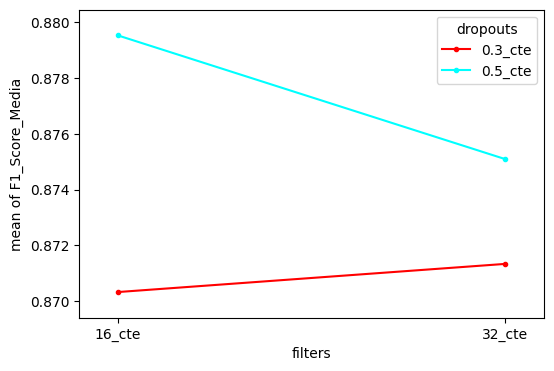

In [10]:
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.filters,
    trace    = df.dropouts,
    response = df.F1_Score_Media,
    ax       = ax,
)

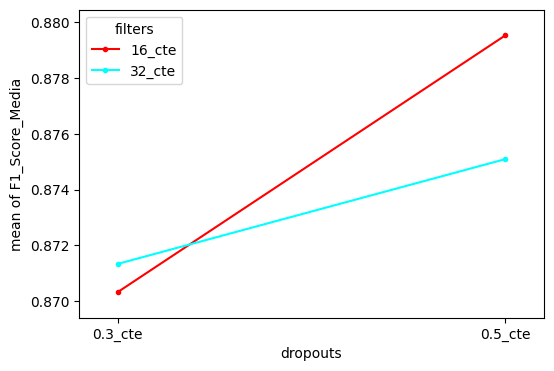

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = df.dropouts,
    trace    = df.filters,
    response = df.F1_Score_Media,
    ax       = ax,
)

In [12]:
# Test ANOVA de dos vías (Two-way ANOVA)
# ==============================================================================
pg.anova(
    data     = df,
    dv       = 'F1_Score_Media',
    between  = ['dropouts', 'filters'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,dropouts,0.0047,1.0,0.0047,1.9204,0.1665,0.0044
1,filters,0.0003,1.0,0.0003,0.1352,0.7133,0.0003
2,dropouts * filters,0.0008,1.0,0.0008,0.3366,0.5621,0.0008
3,Residual,1.0678,438.0,0.0024,NaN,NaN,NaN


### dropouts:

- F (1.9204): La estadística F no es muy alta.  
- p-unc (0.1665): El p-valor es mayor que 0.05, lo que significa que no hay evidencia significativa para concluir que el dropout afecta significativamente el rendimiento.  
- np2 (0.0044): El tamaño del efecto es muy pequeño, indicando que el dropout explica solo el 0.44% de la varianza en el rendimiento.

### filters:

- F (0.1352): La estadística F es muy baja.  
- p-unc (0.7133): El p-valor es mucho mayor que 0.05, lo que significa que no hay evidencia significativa para concluir que el número de filtros afecta significativamente el rendimiento.  
- np2 (0.0003): El tamaño del efecto es insignificante, indicando que el número de filtros explica solo el 0.03% de la varianza en el rendimiento.


### dropouts * filters:

- F (0.3366): La estadística F es baja.  
- p-unc (0.5621): El p-valor es mayor que 0.05, lo que significa que no hay evidencia significativa para concluir que hay una - interacción significativa entre dropouts y filtros en el rendimiento.  
- np2 (0.0008): El tamaño del efecto es muy pequeño